In [1]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 1.2) ##

## D.Sapalidis, St. Gallen, Switzerland, 26.06.2024 ##

## Part I: Excel sheets separation from the single .xlsx raw data from ZetaSizer to .csv files ##

import os
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

def excel_to_csv_folder(input_folder, output_folder):
    # List all files in the input folder
    files = os.listdir(input_folder)
    
    # Filter only Excel files
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
    
    # Loop through each Excel file
    for excel_file in excel_files:
        
        excel_path = os.path.join(input_folder, excel_file)
        
        
        xls = pd.ExcelFile(excel_path)
        
        # Loop through each sheet and convert to CSV
        for sheet_name in xls.sheet_names:
            # Read each sheet 
            df = pd.read_excel(excel_path, sheet_name=sheet_name)
            
            # Define CSV file name
            csv_filename = f"PhD-Empa-MetrINo-DLS-{sheet_name}.csv"
            
            # Construct full output path
            output_csv_file = os.path.join(output_folder, csv_filename)
            
            # Write sheet to CSV
            df.to_csv(output_csv_file, index=False)
            
            print(f"Converted sheet '{sheet_name}' from '{excel_file}' to CSV: {output_csv_file}")

# Example usage:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting"
output_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting"



input_folder = pathlib.PureWindowsPath(input_folder).as_posix()
output_folder = pathlib.PureWindowsPath(output_folder).as_posix()

excel_to_csv_folder(input_folder, output_folder)


Converted sheet 'A1H1_H2O_All_no_correlogram' from 'D.Sapalidis-PhD-Empa-MetrIno-Metr16-DLS-UCNPs-H2O-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\PhD-Empa-MetrINo-DLS-A1H1_H2O_All_no_correlogram.csv
Converted sheet 'B2H1_H2O_All_no_correlogram' from 'D.Sapalidis-PhD-Empa-MetrIno-Metr16-DLS-UCNPs-H2O-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\PhD-Empa-MetrINo-DLS-B2H1_H2O_All_no_correlogram.csv
Converted sheet 'A1H1_H2O_All_son_correlogram' from 'D.Sapalidis-PhD-Empa-MetrIno-Metr16-DLS-UCNPs-H2O-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\PhD-Empa-MetrINo-DLS-A1H1_H2O_All_son_correlogram.csv
Converted sheet 'B2H1_H2O_All_son_correlogram' from 'D.Sapalidis-PhD-Empa-MetrIno-Metr16-DLS-UCNPs-H2O-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fi

In [2]:
## Part II: Data sets generation for each angle and sample ##

import os
import pandas as pd
import pathlib

def process_dls_file(file_path, angles):
    # Read CSV file
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    # Calculate the number of columns per angle set
    num_columns_per_angle = 2 * angles
    
    # Initialize a counter for the dataset index
    dataset_index = 1
    
    # Loop through the dataframe and split it based on the number of angles
    for start_col in range(0, df.shape[1], num_columns_per_angle):
        # Select the relevant subset of columns
        subset_df = df.iloc[:, start_col:start_col + num_columns_per_angle]
        
        # Extract the sample name from the first column header
        full_header = df.columns[start_col]
        sample_name = full_header.split('Time (µs) -')[-1].split('[Steady state]')[0].strip()
        
        # Generate the output file name
        output_file_name = f"{sample_name}_dataset.txt"
        output_file_path = os.path.join(os.path.dirname(file_path), output_file_name)
        
        # Save the subset to a TXT file
        subset_df.to_csv(output_file_path, index=False, sep=',')
        print(f"Saved: {output_file_path}")
        
        # Increment the dataset index
        dataset_index += 1

def process_dls_folder(folder_path, angles):
    # Iterate over all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            process_dls_file(file_path, angles)

# User-defined number of angles
angles = 3  #For multi-angle DLS >1

# Example usage:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting"
input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_dls_folder(input_folder, angles)


Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_5_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_25_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_125_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_0625_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_5_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_25_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_125_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting\A1H1_FBS_0_0625_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_002

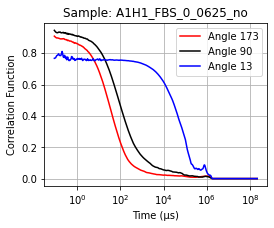

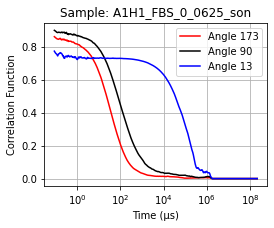

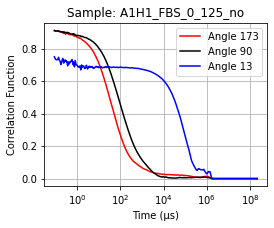

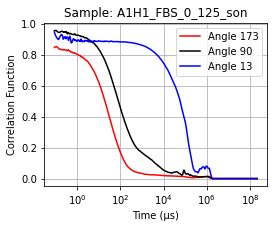

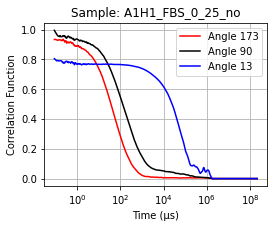

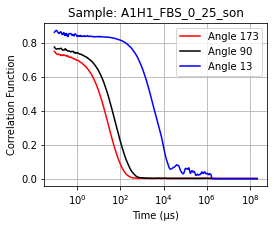

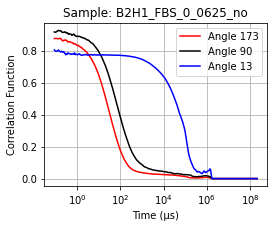

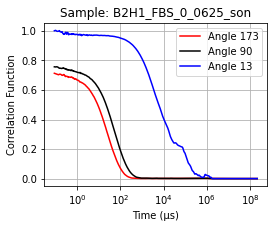

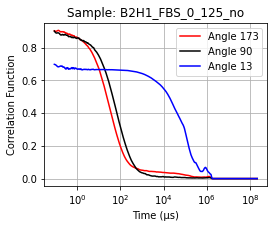

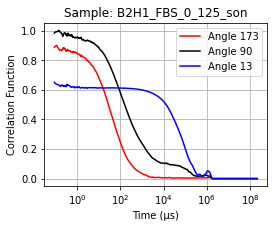

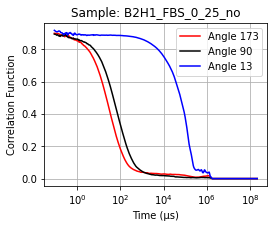

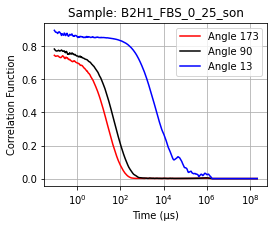

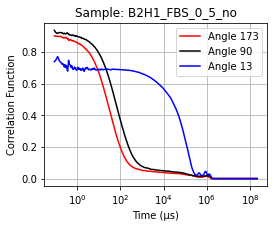

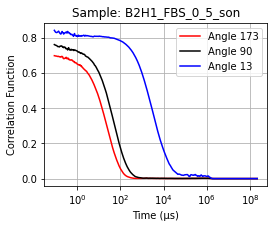

In [107]:
## Part III: Plotting all the angles of each sample into a single graph ##

import os
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

def plot_dls_data_from_txt(file_path, angles, angle_values):
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    # Extract sample name from file name
    sample_name = os.path.basename(file_path).replace('_dataset.txt', '')
    
    
    colors = ['red', 'black', 'blue', 'green', 'orange', 'purple', 'yellow', 'gray']
    
    # Create a plot for the sample
    plt.figure(figsize=(4, 3))  # Adjust figure size here
    
    for i in range(angles):
        time_col = df.columns[2 * i]
        corr_col = df.columns[2 * i + 1]
        
        # Use semi-log scale for X-axis and apply color
        plt.semilogx(df[time_col], df[corr_col], label=f'Angle {angle_values[i]}', color=colors[i])
    
    plt.title(f'Sample: {sample_name}')
    plt.xlabel('Time (µs)')
    plt.ylabel('Correlation Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def process_plots_folder(folder_path, angles, angle_values):
    # Iterate over all TXT files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            plot_dls_data_from_txt(file_path, angles, angle_values)

# User-defined number of angles 
angles = 3  
angle_1 = 173
angle_2 = 90
angle_3 = 13
angle_values = [angle_1, angle_2, angle_3]

# Example usage:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting"
input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_plots_folder(input_folder, angles, angle_values)


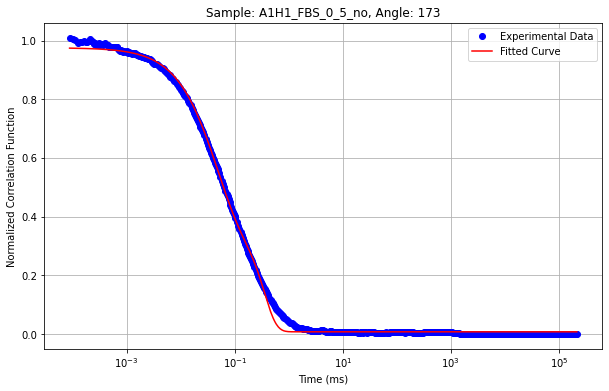

Sample A1H1_FBS_0_5_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.0080±0.0008, β: 0.968±0.002, Γ: 7.2±0.1, PDI: 1.17±0.05
Diffusion Coefficient: 0.0104±0.0001 μm2/ms
Hydrodynamic Diameter: 47.4±0.6 nm


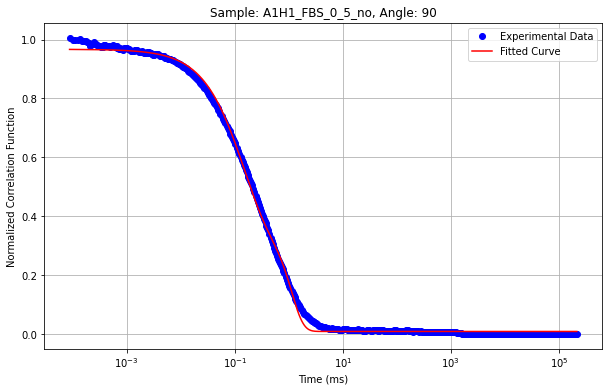

Sample A1H1_FBS_0_5_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.0092±0.0008, β: 0.958±0.001, Γ: 2.31±0.03, PDI: 1.20±0.04
Diffusion Coefficient: 0.00660±0.00008 μm2/ms
Hydrodynamic Diameter: 74.6±0.9 nm


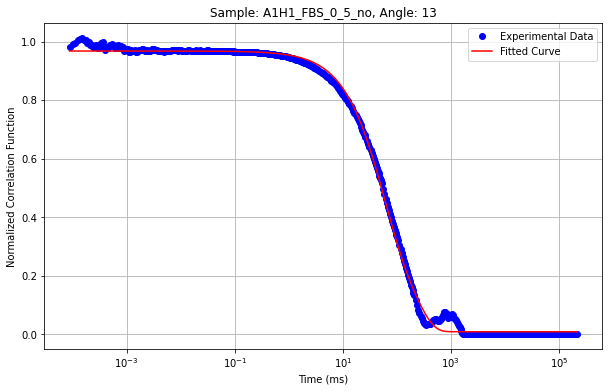

Sample A1H1_FBS_0_5_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.008±0.001, β: 0.960±0.002, Γ: 0.0073±0.0001, PDI: 0.64±0.04
Diffusion Coefficient: 0.00081±0.00001 μm2/ms
Hydrodynamic Diameter: 607±8 nm


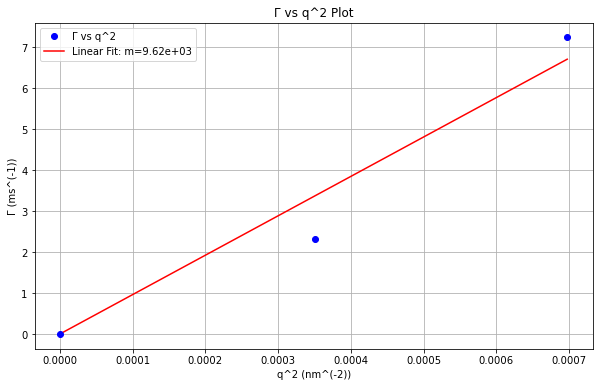


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient: 0.00849±0.00008 μm2/ms
Average Hydrodynamic Diameter: 61.0±0.6 nm


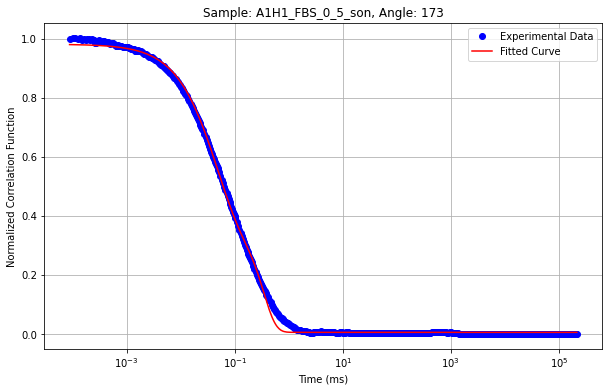

Sample A1H1_FBS_0_5_son
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.0062±0.0007, β: 0.975±0.001, Γ: 7.38±0.08, PDI: 1.15±0.04
Diffusion Coefficient: 0.0106±0.0001 μm2/ms
Hydrodynamic Diameter: 46.5±0.5 nm


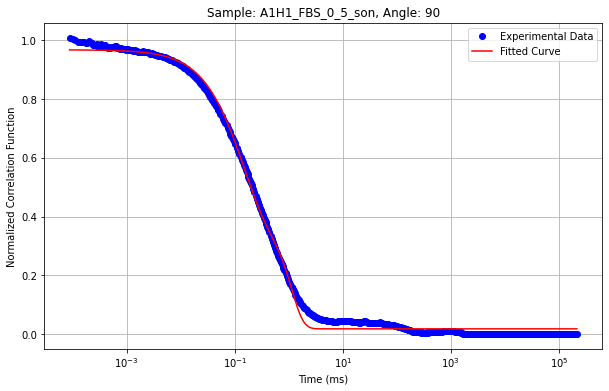

Sample A1H1_FBS_0_5_son
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.018±0.001, β: 0.950±0.002, Γ: 2.31±0.04, PDI: 1.21±0.06
Diffusion Coefficient: 0.0066±0.0001 μm2/ms
Hydrodynamic Diameter: 75±1 nm


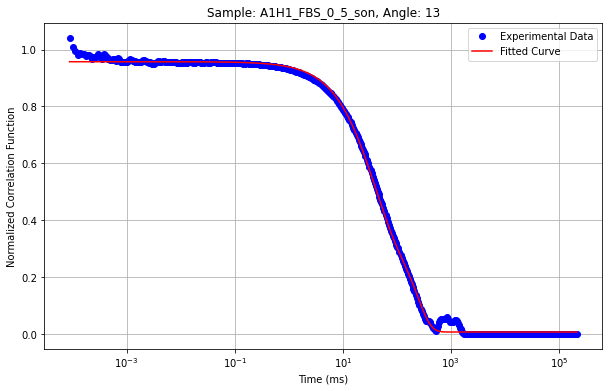

Sample A1H1_FBS_0_5_son
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.008±0.001, β: 0.950±0.001, Γ: 0.0096±0.0001, PDI: 1.01±0.04
Diffusion Coefficient: 0.00107±0.00001 μm2/ms
Hydrodynamic Diameter: 458±5 nm


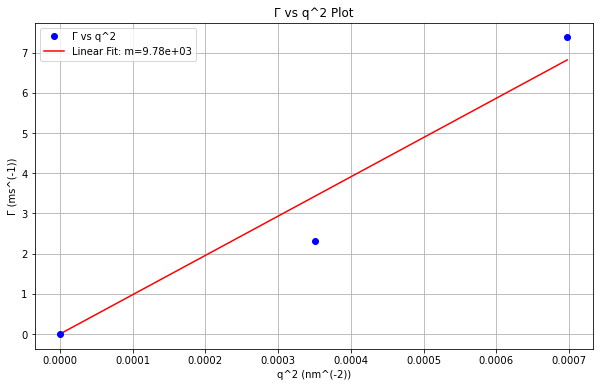


Averaged Results for angles [173, 90]:
Average Diffusion Coefficient: 0.00859±0.00008 μm2/ms
Average Hydrodynamic Diameter: 60.6±0.7 nm


In [108]:
## Part IV: Fitting of the DLS data ##

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *

# Define function to normalize Y-axis
def normalize_y(df):
    for col in df.columns[1::2]:  # Every second column starting from index 1
        mean_first_six = df[col].iloc[:6].mean()
        df[col] = df[col] / mean_first_six
    return df

# Define function to convert X-axis to milliseconds
def convert_to_milliseconds(df):
    for col in df.columns[::2]:  # Every second column starting from index 0
        df[col] = df[col] / 1000
    return df

# Define Cumulants fitting function
def cumulantDLS(xdata, a, b, c, d):
    return a + b * (np.exp(-c * xdata) * (1 + 0.5 * d * xdata**2))**2 # Alastair G. Mailer et al 2015 J. Phys.: Condens. Matter 27 145102 - Equation 13

# Define function to calculate diffusion coefficient and its uncertainty
def calculate_diffusion_coefficient_and_uncertainty(x2, x2_err, angle):
    q_sq = (((4 * np.pi * refr_Index / lambda_val) * np.sin((angle * np.pi / 180) / 2))**2)  # q_square in nm^(-1)
    diff_coeff = 10**(-6) * x2 / q_sq  # diffusion coefficient in  μm^(2) / ms
    diff_coeff_err = 10**(-6) * x2_err / q_sq
    return diff_coeff, diff_coeff_err, q_sq

# Define function to calculate hydrodynamic radius and its uncertainty
def calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err):
    d_h = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity * diff_coeff)  # d_h in nm
    d_h_err = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity) * (diff_coeff_err / diff_coeff**2)
    return d_h, d_h_err

# Define function to format numbers with uncertainties to one significant digit
def format_with_uncertainty(value, error):
    u_val = ufloat(value, error)
    return f"{u_val:.1uP}"

# Define function to process each file
def process_dls_file(file_path, angles, angle_values, angles_for_average):
    # Read the TXT file
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    # Normalize Y-axis
    df_normalized = normalize_y(df)
    
    # Convert X-axis to milliseconds
    df_normalized_ms = convert_to_milliseconds(df_normalized)
    
    # Initialize arrays to store fitting results
    F_fit = np.zeros((angles, len(df_normalized)))
    X_fit = np.zeros((angles, len(df_normalized), 4))
    Residuals = np.zeros((angles, len(df_normalized)))
    Errors = np.zeros((angles, 4))  # To store uncertainties
    
    # Initialize lists to store results for selected angles
    diff_coeff_list = []
    diff_coeff_err_list = []
    d_h_list = []
    d_h_err_list = []
    
    # Lists to store Γ and q^2 values
    gamma_values = []
    q_square_values = []
    
    # Perform fitting for each angle
    for idx in range(angles):
        xdata = df_normalized_ms.iloc[:, 2 * idx].values
        ydata = df_normalized_ms.iloc[:, 2 * idx + 1].values
        
        # Initial guesses for fitting parameters
        x0_g = [0.0, 1.0, 1.0, 0.4]
        
        # Perform curve fitting
        x, cov = curve_fit(cumulantDLS, xdata, ydata, p0=x0_g)
        errors = np.sqrt(np.diag(cov))  # Uncertainties of the fitting parameters
        F_fit[idx] = cumulantDLS(xdata, *x)
        X_fit[idx] = x
        Residuals[idx] = ydata - F_fit[idx]
        Errors[idx] = errors
        
        # Calculate diffusion coefficient and its uncertainty
        diff_coeff, diff_coeff_err, q_sq = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
        
        # Store Γ and q^2 values
        gamma_values.append(x[2])
        q_square_values.append(q_sq)
        
        # Calculate hydrodynamic diameter and its uncertainty
        hydrodynamic_diameter, hydrodynamic_diameter_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err)
        
        # Store results if the angle is in the angles_for_average list
        if angle_values[idx] in angles_for_average:
            diff_coeff_list.append(ufloat(diff_coeff, diff_coeff_err))
            d_h_list.append(ufloat(hydrodynamic_diameter, hydrodynamic_diameter_err))
        
        # Plot experimental and fitted curves
        plt.figure(figsize=(10, 6))
        plt.semilogx(xdata, ydata, 'bo', label='Experimental Data')
        plt.semilogx(xdata, F_fit[idx], 'r-', label='Fitted Curve')
        plt.title(f'Sample: {os.path.basename(file_path).replace("_dataset.txt", "")}, Angle: {angle_values[idx]}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Normalized Correlation Function')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print fitting parameters with uncertainties
        print(f'Sample {os.path.basename(file_path).replace("_dataset.txt", "")}')
        print(f"Angle {angle_values[idx]}:")
        print(f"q^2: {q_sq}")
        print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, β: {format_with_uncertainty(x[1], errors[1])}, Γ: {format_with_uncertainty(x[2], errors[2])}, PDI: {format_with_uncertainty(x[3]/(x[2]**2), errors[3]/(x[2]**2))}")
        print(f"Diffusion Coefficient: {format_with_uncertainty(diff_coeff, diff_coeff_err)} μm2/ms")
        print(f"Hydrodynamic Diameter: {format_with_uncertainty(hydrodynamic_diameter, hydrodynamic_diameter_err)} nm")
    
    # Plot Γ vs q^2 for selected angles
    if diff_coeff_list and d_h_list:
        plot_gamma_vs_q_square(gamma_values, q_square_values, angles_for_average)
    
    # Calculate averages
    if diff_coeff_list and d_h_list:
        avg_diff_coeff = np.mean(diff_coeff_list)
        avg_d_h = np.mean(d_h_list)
        
        # Print average results
        print(f"\nAveraged Results for angles {angles_for_average}:")
        print(f"Average Diffusion Coefficient: {avg_diff_coeff:.1uP} μm2/ms")
        print(f"Average Hydrodynamic Diameter: {avg_d_h:.1uP} nm")
    
    return F_fit, X_fit, Residuals, Errors, gamma_values, q_square_values

# Define function to plot Γ vs q^2 with linear fitting passing through (0,0)
def plot_gamma_vs_q_square(gamma_values, q_square_values, angles_for_average):
    # Perform linear fitting only for angles in angles_for_average
    angles_indices = [angle_values.index(angle) for angle in angles_for_average]
    q_square_values_selected = np.array([q_square_values[idx] for idx in angles_indices])
    gamma_values_selected = np.array([gamma_values[idx] for idx in angles_indices])
    
    # Perform linear fitting passing through (0,0)
    def linear_fit_through_origin(x, m):
        return m * x
    
    # Fit the data using least squares method forcing intercept through zero
    popt, _ = curve_fit(linear_fit_through_origin, q_square_values_selected, gamma_values_selected)
    
    # Plot data points and linear fit passing through (0,0)
    plt.figure(figsize=(10, 6))
    plt.plot(q_square_values_selected, gamma_values_selected, 'bo', label='Γ vs q^2')
    
    # Calculate the y-values of the linear fit at q^2 = 0 and q^2 = max(q_square_values_selected)
    y_fit_at_zero = linear_fit_through_origin(0, *popt)
    y_fit_at_max = linear_fit_through_origin(max(q_square_values_selected), *popt)
    
    # Plot the linear fit passing through (0,0)
    plt.plot([0, max(q_square_values_selected)], [y_fit_at_zero, y_fit_at_max], 'r-', label=f'Linear Fit: m={popt[0]:.2e}')  # Linear fit through (0,0)
    
    # Plot (0,0) point
    plt.plot([0], [0], 'bo')  # Plot (0,0) point with the same color
    
    plt.xlabel('q^2 (nm^(-2))')
    plt.ylabel('Γ (ms^(-1))')
    plt.title('Γ vs q^2 Plot')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define function to process all files in a folder
def process_plots_folder(folder_path, angles, angle_values, angles_for_average):
    # Iterate over all TXT files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            _, _, _, _, gamma_values, q_square_values = process_dls_file(file_path, angles, angle_values, angles_for_average)

# User-defined parameters
angles = 3  # angle number
angle_values = [173, 90, 13]  # angle values
lambda_val = 633  # source wavelength in nm
refr_Index = 1.3329  # solvent refractive index
k_Boltzman = 1.38065e-23  # J*K ^ (-1)
temperature = 25  # in Celsius
viscosity = 0.887e-3  # water at 25 oC
Temp_K = temperature + 273

# Example usage:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"
angles_for_average = [173, 90]  # angles for averaging

# Convert input_folder to POSIX format
input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

# Process all files in the input folder
process_plots_folder(input_folder, angles, angle_values, angles_for_average)